In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [58]:
pd.set_option("display.max_columns",None)

df = pd.read_csv('diamonds_hw.csv')

In [59]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [60]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [62]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [63]:
data=df.copy()
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Kolom-kolom dari dataset 'diamonds.csv' memiliki definisi sebagai berikut:
- price: price in US dollars ($326--$18,823)
- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm 
- y: width in mm 
- z: depth in mm 
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) 
- table: width of top of diamond relative to widest point


### Soal:

1. Terdapat beberapa kolom yang mengalami missing value. Tentukan metode terbaik untuk mengisi missing value pada kolom tersebut. Terapkan metode tersebut, dan berikan argumen Anda! (Tuliskan, "saya memilih metode __ untuk mengisi missing value pada kolom __ karena ___). 

2. Berdasarkan informasi terkait kolom `clarity`, lakukanlah encoding yang sesuai (ubahlah kolom `clarity` dari kategorikal menjadi numerik). 

2. Buatlah visualisasi boxplot untuk memeriksa distribusi pada kolom-kolom 'x', 'y', dan 'z'. Apakah ada data-data yang outlier? Jika ya, apa saja outlier yang muncul? Berapa banyak baris yang mengalami outlier?

#### Nomor 1:

In [64]:
data.isna().sum()

carat      125
cut          0
color        0
clarity      0
depth        0
table        0
price        0
x            0
y            0
z            0
dtype: int64

In [65]:
data.duplicated().sum()

146

In [66]:
data[data.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [67]:
data = data.drop_duplicates(keep='first')

In [68]:
data.duplicated().sum()

0

In [69]:
total_missing = data.isna().sum().sum()

print(f"Percentase Missing secara keseluruhan ada {total_missing*100/data.shape[0]}")

Percentase Missing secara keseluruhan ada 0.23236792207309365


In [70]:
data = data.dropna()

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53669 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53669 non-null  float64
 1   cut      53669 non-null  object 
 2   color    53669 non-null  object 
 3   clarity  53669 non-null  object 
 4   depth    53669 non-null  float64
 5   table    53669 non-null  float64
 6   price    53669 non-null  int64  
 7   x        53669 non-null  float64
 8   y        53669 non-null  float64
 9   z        53669 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


Saya memilih metode menghapus baris untuk mengisi missing value pada kolom Carat karena Missing value secara keseluruhan dibawah 1%


#### Nomor 2:

In [80]:
data['clarity']=data['clarity'].astype(str).str.extract('(\d+)').astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53669 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53669 non-null  float64
 1   cut      53669 non-null  object 
 2   color    53669 non-null  object 
 3   clarity  51890 non-null  float64
 4   depth    53669 non-null  float64
 5   table    53669 non-null  float64
 6   price    53669 non-null  int64  
 7   x        53669 non-null  float64
 8   y        53669 non-null  float64
 9   z        53669 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.5+ MB


In [83]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,2.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,1.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,1.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,2.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,2.0,63.3,58.0,335,4.34,4.35,2.75


#### Nomor 3:

### Buatlah visualisasi boxplot untuk memeriksa distribusi pada kolom-kolom 'x', 'y', dan 'z'. Apakah ada data-data yang outlier? Jika ya, apa saja outlier yang muncul? Berapa banyak baris yang mengalami outlier?

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >]], dtype=object)

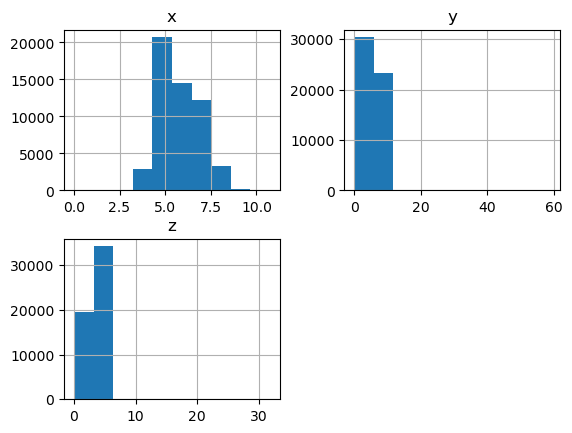

In [115]:
data.hist(['x', 'y', 'z'])


In [118]:
#quartil bawah
Q1 = data[['x', 'y', 'z']].quantile(0.25)

print(Q1)

x    4.71
y    4.72
z    2.91
Name: 0.25, dtype: float64


In [119]:
#kuartil atas
Q3 = data[['x', 'y', 'z']].quantile(0.75)

print(Q3)

x    6.54
y    6.54
z    4.03
Name: 0.75, dtype: float64


In [120]:
#kuartil tengah
Q2 = data[['x', 'y', 'z']].quantile(0.50)

print(Q2)

x    5.70
y    5.71
z    3.53
Name: 0.5, dtype: float64


In [121]:
IQR = Q3 - Q1
IQR

x    1.83
y    1.82
z    1.12
dtype: float64

In [122]:
# calculate the min and max
min_data = Q1 - 1.5*IQR
max_data = Q3 + 1.5*IQR

# show calculations
min_data, Q1, Q2, Q3, max_data

(x    1.965
 y    1.990
 z    1.230
 dtype: float64,
 x    4.71
 y    4.72
 z    2.91
 Name: 0.25, dtype: float64,
 x    5.70
 y    5.71
 z    3.53
 Name: 0.5, dtype: float64,
 x    6.54
 y    6.54
 z    4.03
 Name: 0.75, dtype: float64,
 x    9.285
 y    9.270
 z    5.710
 dtype: float64)

<Axes: >

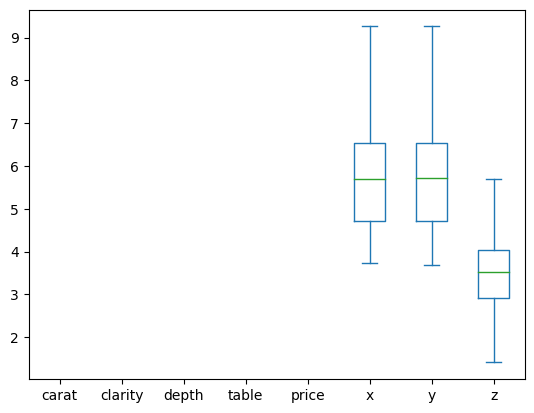

In [123]:
kondisi = (data[['x', 'y', 'z']]>min_data) & (data[['x', 'y', 'z']]<max_data)

data[kondisi].plot(kind="box")

In [129]:

def find_outliers(column):
    # Calculate the 25th and 75th percentiles.
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    
    # Find the interquartile range.
    IQR = Q3 - Q1
    
    # Define what's considered an outlier.
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Return values outside these limits.
    return column[(column < lower_limit) | (column > upper_limit)]

# This will keep track of the row numbers with outliers.
outlier_rows = []

# Check each column and print outliers.
for col in ['x', 'y', 'z']:
    outliers = find_outliers(data[col])
    if not outliers.empty:
        print(f"Column {col} has outliers at rows:")
        print(outliers.index.tolist())  # List the row numbers with outliers
        outlier_rows.extend(outliers.index.tolist())

# Calculate the unique rows that have outliers.
unique_rows_with_outliers = len(set(outlier_rows))
print(f"\nTotal rows with outliers: {unique_rows_with_outliers}")


Column x has outliers at rows:
[11182, 11963, 15951, 22741, 22831, 23644, 24131, 24297, 24328, 24520, 24816, 25460, 25850, 25998, 25999, 26243, 26431, 26444, 26534, 26932, 27130, 27415, 27429, 27514, 27630, 27638, 27649, 27679, 27684, 27685, 49556]
Column y has outliers at rows:
[11963, 15951, 22741, 22831, 23644, 24067, 24131, 24297, 24328, 24520, 25460, 25998, 25999, 26243, 26431, 26444, 26534, 27130, 27415, 27429, 27514, 27630, 27638, 27649, 27679, 27685, 49189, 49556]
Column z has outliers at rows:
[2207, 2314, 4791, 5471, 10167, 11182, 11963, 13601, 14635, 15951, 16283, 17196, 19346, 21758, 21862, 22540, 23539, 23644, 24067, 24131, 24297, 24328, 24394, 24520, 25998, 25999, 26100, 26123, 26194, 26243, 26431, 26444, 26534, 26744, 26933, 27112, 27130, 27415, 27429, 27503, 27515, 27517, 27630, 27679, 27739, 48410, 49556, 51506]

Total rows with outliers: 60


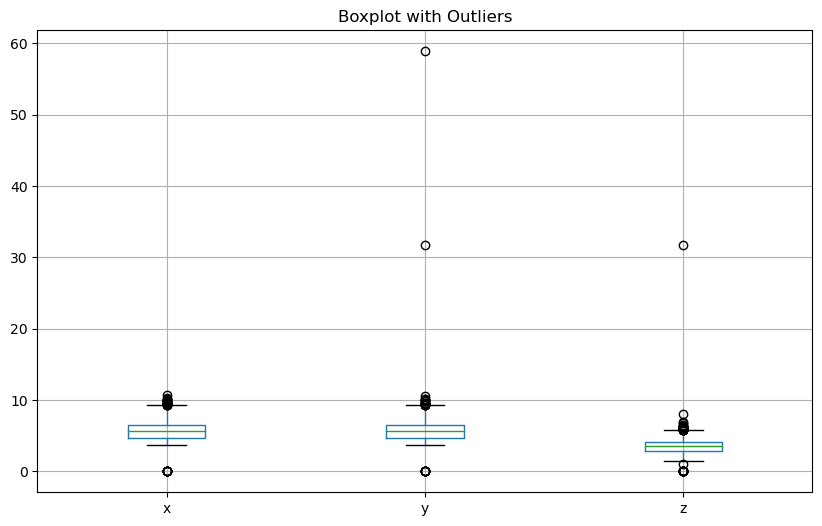

In [127]:
def plot_boxplot(data, columns):
    plt.figure(figsize=(10,6))
    data.boxplot(column=columns)
    plt.title("Boxplot with Outliers")
    plt.show()

# Assuming `df` is the DataFrame that holds your data
columns_to_check = ['x', 'y', 'z']
plot_boxplot(df, columns_to_check)
